In [3]:
import matplotlib.pyplot as plt
import networkx as nx
from IPython.display import SVG, display

In [4]:
def draw(G):
    nx.draw_networkx(G)
    plt.show()

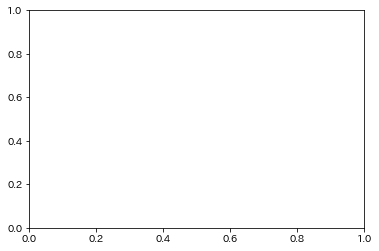

In [5]:
G = nx.DiGraph()  # 有向グラフ (Directed Graph)
draw(G)

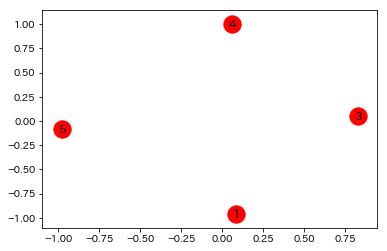

In [6]:
# 頂点の追加
G.add_node(1)                
G.add_nodes_from([3, 4, 5])
draw(G)

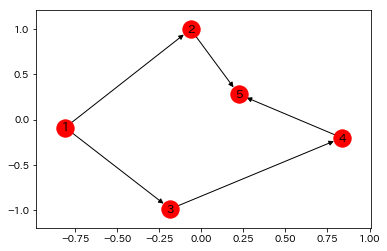

In [7]:
# 辺の追加 (頂点も必要に応じて追加されます)
G.add_edge(1, 2)                                    
G.add_edges_from([(1, 3), (2, 5), (3, 4), (4, 5)])
draw(G)

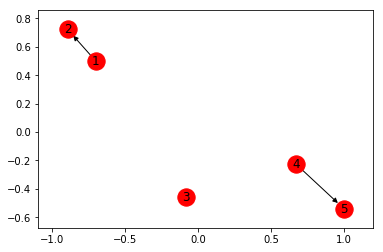

In [25]:
# 辺の削除
G.remove_edge(3, 4)                    
G.remove_edges_from([(1, 3), (2, 5)])
draw(G)

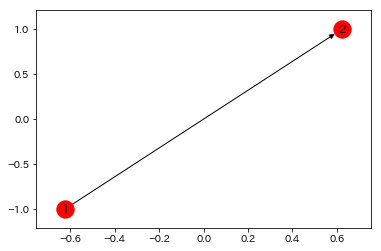

In [8]:
# 頂点の削除 (削除された頂点に接続されている辺も削除されます)
G.remove_node(5)
G.remove_nodes_from([3, 4])
draw(G)

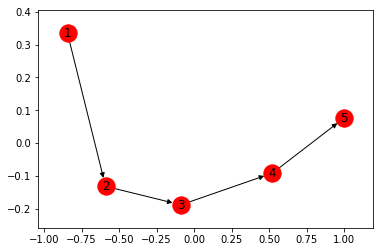

In [27]:
# 指定したパス上の頂点と辺を追加
G.add_path([1, 2, 3, 4, 5])  # 1 → 2 → 3 → 4 → 5
draw(G)

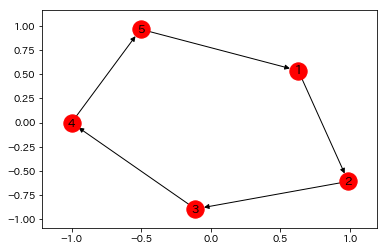

In [9]:
# 指定した閉路上の頂点と辺を追加
G.add_cycle([1, 2, 3, 4, 5])  # 1 → 2 → 3 → 4 → 5 → 1
draw(G)

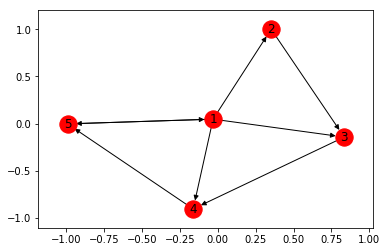

In [29]:
# 放射状に頂点と辺を追加
G.add_star([1, 2, 3, 4, 5])  # 1 → 2, 1 → 3, 1 → 4, 1 → 5
draw(G)

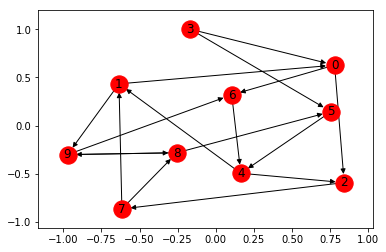

In [30]:
G2 = nx.DiGraph()
G2.add_path([3, 5, 4, 1, 0, 2, 7, 8, 9, 6])
G2.add_path([3, 0, 6, 4, 2, 7, 1, 9, 8, 5])
draw(G2)

In [11]:
nx.nx_agraph.view_pygraphviz(G, prog='fdp')  # pygraphvizが必要

('/tmp/tmpvqbou740.png',
 <AGraph <Swig Object of type 'Agraph_t *' at 0x7f4db8205b70>>)

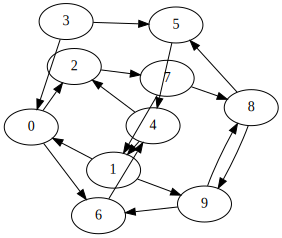

In [10]:
G3 = nx.DiGraph()
G3.add_path([3, 5, 4, 1, 0, 2, 7, 8, 9, 6])
G3.add_path([3, 0, 6, 4, 2, 7, 1, 9, 8, 5])

svg = SVG(nx.nx_agraph.to_agraph(G3).draw(prog='fdp', format='svg'))
display(svg)

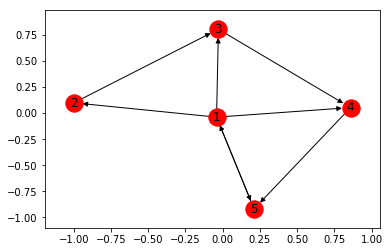

[1, 2, 3, 4, 5]
[(1, 2), (1, 3), (1, 4), (1, 5), (2, 3), (3, 4), (4, 5), (5, 1)]
[2, 3, 4, 5] [(1, 2), (1, 3), (1, 4), (1, 5)]
[4, 1] [(4, 5), (1, 5)]
3 [3, 1, 5]


In [37]:
G = nx.DiGraph()
G.add_cycle([1, 2, 3, 4, 5])
G.add_star([1, 2, 3, 4, 5])
draw(G)
# 頂点の一覧
print(list(G.nodes))
# [1, 2, 3, 4, 5]

# 辺の一覧
print(list(G.edges))
# [(1, 2), (1, 3), (1, 4), (1, 5), (2, 3), (3, 4), (4, 5), (5, 1)]

# 指定した始点に対する、終点の一覧と辺の一覧
print(list(G.succ[1]), G.out_edges(1))
# [2, 3, 4, 5] [(1, 2), (1, 3), (1, 4), (1, 5)]

# 指定した終点に対する、始点の一覧と辺の一覧
print(list(G.pred[5]), G.in_edges(5))
# [4, 1] [(4, 5), (1, 5)]

# 指定した頂点に対する、隣接している頂点の数とその一覧
print(G.degree(4), list(nx.all_neighbors(G, 4)))
# 3, [3, 1, 5]

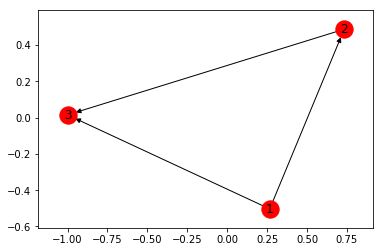

{1: {'a': 'Alice'}, 2: {}, 3: {}}
{(1, 2): {'b': 'Bob'}, (1, 3): {'d': 'Dave'}, (2, 3): {'c': 'Carol'}}
{1: {2: {'b': 'Bob'}, 3: {'d': 'Dave'}}, 2: {3: {'c': 'Carol'}}, 3: {}}
{1: {}, 2: {1: {'b': 'Bob'}}, 3: {1: {'d': 'Dave'}, 2: {'c': 'Carol'}}}


In [38]:
G = nx.DiGraph()
G.add_edges_from([(1, 2), (1, 3), (2, 3)])

# G.nodes[頂点][属性キー] = 属性値
G.nodes[1]['a'] = 'Alice'

# G.edges[辺][属性キー] = 属性値
G.edges[1, 2]['b'] = 'Bob'

# G.succ[始点][終点][属性キー] = 属性値
G.succ[2][3]['c'] = 'Carol'

# G.pred[終点][始点][属性キー] = 属性値
G.pred[3][1]['d'] = 'Dave'

draw(G)

print(dict(G.nodes))
# {1: {'a': 'Alice'}, 2: {}, 3: {}}

print(dict(G.edges))
# {(1, 2): {'b': 'Bob'}, (1, 3): {'d': 'Dave'}, (2, 3): {'c': 'Carol'}}

print(G.succ)
# {1: {2: {'b': 'Bob'}, 3: {'d': 'Dave'}}, 2: {3: {'c': 'Carol'}}, 3: {}}

print(G.pred)
# {1: {2: {'b': 'Bob'}, 3: {'d': 'Dave'}}, 2: {3: {'c': 'Carol'}}, 3: {}}

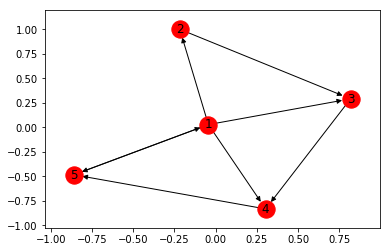

[2, 3, 4, 5, 1]
{2: [2], 3: [2, 3], 4: [2, 3, 4], 5: [2, 3, 4, 5], 1: [2, 3, 4, 5, 1]}
{1: [1], 5: [5, 1], 4: [4, 5, 1], 3: [3, 4, 5, 1], 2: [2, 3, 4, 5, 1]}
{1: {1: [1], 2: [1, 2], 3: [1, 3], 4: [1, 4], 5: [1, 5]}, 2: {2: [2], 3: [2, 3], 4: [2, 3, 4], 5: [2, 3, 4, 5], 1: [2, 3, 4, 5, 1]}, 3: {3: [3], 4: [3, 4], 5: [3, 4, 5], 1: [3, 4, 5, 1], 2: [3, 4, 5, 1, 2]}, 4: {4: [4], 5: [4, 5], 1: [4, 5, 1], 2: [4, 5, 1, 2], 3: [4, 5, 1, 3]}, 5: {5: [5], 1: [5, 1], 2: [5, 1, 2], 3: [5, 1, 3], 4: [5, 1, 4]}}
{1: [1], 5: [5, 1], 4: [4, 5, 1]}
{3: [3], 4: [3, 4], 5: [3, 4, 5]}
[[1, 2, 3, 4, 5], [1, 3, 4, 5], [1, 4, 5], [1, 5]]


In [40]:
G = nx.DiGraph()
G.add_cycle([1, 2, 3, 4, 5])
G.add_star([1, 2, 3, 4, 5])
draw(G)
# 2点間の最短経路
print(nx.shortest_path(G, source=2, target=1))
# [2, 3, 4, 5, 1]

# 指定した点から各点への最短経路
print(nx.shortest_path(G, source=2))
# {1: [2, 3, 4, 5, 1], 2: [2], 3: [2, 3], 4: [2, 3, 4], 5: [2, 3, 4, 5]}

# 各点から指定した点への最短経路
print(nx.shortest_path(G, target=1))
# {1: [1], 2: [2, 3, 4, 5, 1], 3: [3, 4, 5, 1], 4: [4, 5, 1], 5: [5, 1]}

# 各点から各点への最短経路
print(nx.shortest_path(G))
# ...

# ゴール地点までの最短経路長が、ある長さ未満に収まるスタート地点とその経路
print(nx.single_target_shortest_path(G, target=1, cutoff=2))
# {1: [1], 4: [4, 5, 1], 5: [5, 1]}

# スタート地点からの最短経路長が、ある長さ未満に収まるゴール地点とその経路
print(nx.single_source_shortest_path(G, source=3, cutoff=2))
# {3: [3], 4: [3, 4], 5: [3, 4, 5]}

# スタート地点からゴール地点までのすべての単純路 (同じ頂点を通らないパス)
print(list(nx.all_simple_paths(G, source=1, target=5)))
# [[1, 2, 3, 4, 5], [1, 3, 4, 5], [1, 4, 5], [1, 5]]